Importing libraries

In [ ]:
from sklearn import metrics
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import datetime as dt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from sklearn import metrics
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import r2_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import StackingClassifier
from sklearn.cluster import KMeans


Loading the data

In [ ]:
members = pd.read_csv('/content/members.csv')
songextrainfo = pd.read_csv('/content/song_extra_info.csv')
song = pd.read_csv('/content/songs.csv')
train = pd.read_csv('/content/train.csv')

Anayzing the data

In [ ]:
members.head(100)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
95,8sEEszoN7JW047C9Qt5XN29r7UJwsb5J6RWTz8gLlqE=,1,0,NaN,7,20130604,20171004
96,5aK/dB0N/7AuXaOmBdXsawoIgJ3I6332BH5tBvChWt4=,11,34,female,9,20120627,20171022
97,1yd9fOVZVhdmRiBQSGNNIkt1auPjBJ1nSHWhVHLR9Fg=,13,0,NaN,4,20151107,20170930
98,hZ4kF/3r+IOCcO+h0oPXypRkx17TF0LI0tq1qATx4/4=,4,32,male,3,20120606,20120613


members dataframe - Member serial no, 

In [ ]:
songextrainfo.head(100)

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
95,BzLojXj3nde+kOyOFx0Q0zDxyxbitlsdfhhg2Q7xDjU=,What Time Is It,USWD10731999
96,5T18vNgsFtCKs03RiXei/IdH+aJudCEp1WanSK1eDjY=,最懂得愛你,TWB519805906
97,jgkHcQGMojHLaYUWGxXhw/NaPsxD05Z3X3OVea1HwxI=,愛的鼓勵 (Woo),TWA531480009
98,wClbvD0nyZ///xIZwcpgnZVq5R6AXZJPnAJ1bUo6obU=,你和我 (You and Me),JPU901603290


Song_extra_info - Contains unique song_id, name of the song, isrc uniquely determines the song.

In [ ]:
song.head(100)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
95,/XuPT2n3/VjGZuKKCxEwj97F6DRWiyBmFQpoZN8I5/M=,219324,1609|2107,Kyary Pamyu Pamyu (きゃりーぱみゅぱみゅ),Yasutaka Nakata,Yasutaka Nakata,17.0
96,XCLTSwcKdd4emAdtdyYPKU8XPCJwh0GH2JwQhI4Bf0U=,186906,2022,Skillet,John L. Cooper| Korey Cooper,NaN,52.0
97,Z0J/qtjv7A5dtkS+xgQ173lvH/s47INk3vbzdC0Y99Y=,235937,465,梁靜茹 (Fish Leong),NaN,NaN,3.0
98,O80yuLYpg2y/512HcLB+gzaH/waW4mC50B1q3mg2qio=,166321,921,Alan Silvestri,Alan Silvestri,NaN,52.0


In [ ]:
train.head(100)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0
...,...,...,...,...,...,...
95,Eaq21N7ijazDjnqU5v1jjWewJopGxgZxkKr4GIq7JTs=,BwDDym6Tp7EnGudWBGJyjONZeX0/4ndu5PETiPWzav8=,my library,NaN,local-library,1.0
96,pNPe9+kUnGJem0nHfYPdQ/Jx5yNlGLTJLshSohjkSdA=,b+OlR6qF0gzG++m+sYrOnf7bJF6WmXv51xGLBpmugxg=,my library,Local playlist more,local-library,1.0
97,pNPe9+kUnGJem0nHfYPdQ/Jx5yNlGLTJLshSohjkSdA=,9tNXaK/yKJfTcoWLRFw6HXplizDxq4bFvzs3scmesCU=,my library,Local playlist more,local-library,1.0
98,pNPe9+kUnGJem0nHfYPdQ/Jx5yNlGLTJLshSohjkSdA=,dKsoBHe5cVhyQSU8CimXs4ysaAky4RNgBwIafHaLkik=,my library,Local playlist more,local-library,1.0


Train dataset - member serialno., song_id of the the song the members listens to, target - says whether the song is listened more than once in the month

In [ ]:
m1 = pd.merge(train,song, on='song_id',how='left')
m2 = pd.merge(m1,songextrainfo, on='song_id',how='left')
msongs = pd.merge(m2,members, on='msno',how='left')
#del m1,m2,members,songextrainfo,song,train
print('Columns of the merge dataset (msongs) are: \n',msongs.columns)

Columns of the merge dataset (msongs) are: 
 Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'name', 'isrc', 'city', 'bd',
       'gender', 'registered_via', 'registration_init_time',
       'expiration_date'],
      dtype='object')


In [ ]:
print(msongs.head(10))

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
5  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
6  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
7  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
8  uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=   
9  uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   
5  3Hg5kugV1S0wzEVLAEfqj

Analysing the data


---



---



In [ ]:
msongs.shape

(15683, 20)

In [ ]:
#Algorithm to find the top listened songs.
t_songs =msongs[msongs['target']==1]
t_songs['rat']=1
top_songs=t_songs.groupby(by=['name'])['rat'].sum()
#print(msongs.columns)
#print(t_songs[12:12])
sorted_top = top_songs.sort_values(ascending=False)
print(sorted_top.head())

name
告白氣球                            3977
帥到分手                            3689
你，好不好？ (How Have You Been?)     3532
謝謝妳愛我 (Thanks For Your Love)    3334
Closer                          3285
Name: rat, dtype: int64


In [ ]:
#Algorithm to find the least listened songs.
t_songs =msongs[msongs['target']==0]
t_songs['rat']=1
top_songs=t_songs.groupby(by=['name'])['rat'].sum()
#print(msongs.columns)
#print(t_songs[12:12])
sorted_top = top_songs.sort_values(ascending=False)
print(sorted_top.tail())

name
Uramado                                            1
Uranium Fever                                      1
Uranium Rock                                       1
Uranium-Chan                                       1
 24karats –type S-(與放浪兄弟EXILE、DOBELMAN合作超跳嘻哈單曲)    1
Name: rat, dtype: int64


In [ ]:
#Getting the sum of null values
print(msongs.isnull().sum())

msno                         0
song_id                      0
source_system_tab           51
source_screen_name         679
source_type                 41
target                       2
song_length                  2
genre_ids                  287
artist_name                  2
composer                  3404
lyricist                  6418
language                     2
name                         2
isrc                      1214
city                         1
bd                           1
gender                    6458
registered_via               1
registration_init_time       1
expiration_date              1
dtype: int64


Data Cleaning

In [ ]:
#Finding the duplicates
msongs.duplicated().sum()

0

In [ ]:
msongs.isnull().mean()

msno                      0.000000
song_id                   0.000000
source_system_tab         0.003252
source_screen_name        0.043295
source_type               0.002614
target                    0.000128
song_length               0.000128
genre_ids                 0.018300
artist_name               0.000128
composer                  0.217050
lyricist                  0.409233
language                  0.000128
name                      0.000128
isrc                      0.077409
city                      0.000064
bd                        0.000064
gender                    0.411783
registered_via            0.000064
registration_init_time    0.000064
expiration_date           0.000064
dtype: float64

Text(0.5, 1.0, 'Quantifying missing data')

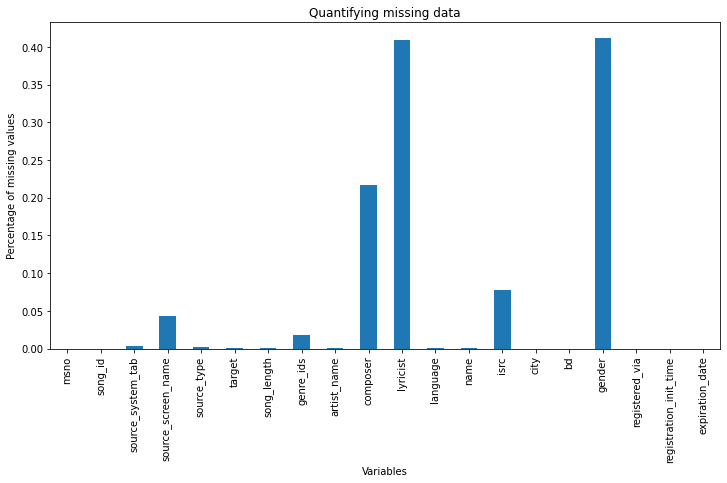

In [ ]:
#Quantifying the missing data
msongs.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [ ]:
#Splitting the integer valued columns.
integer_columns=msongs.select_dtypes(include=['int64','float64']).columns.tolist()
print(integer_columns)

['target', 'song_length', 'language', 'city', 'bd', 'registered_via', 'registration_init_time', 'expiration_date']


Filling nullvalues

---



---



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


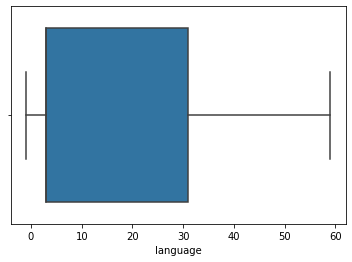

In [ ]:
#Filling the integer data having outliers(skewed data) with mode and no outliers(non-skewed) with mean.
#fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(msongs.language)
#msongs.boxplot('target')
#msongs.boxplot(column=['target', 'song_length', 'language', 'city', 'bd', 'registered_via', 'registration_init_time', 'expiration_date'])

In [ ]:
msongs['language'].fillna(msongs['language'].mode()[0], inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


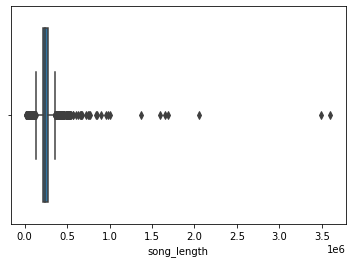

In [ ]:
sns.boxplot(msongs.song_length)

In [ ]:
msongs['song_length'].fillna(msongs['song_length'].mode()[0], inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


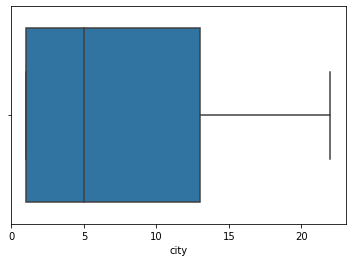

In [ ]:
sns.boxplot(msongs.city)

In [ ]:
msongs['city'].fillna(msongs['city'].mean(), inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


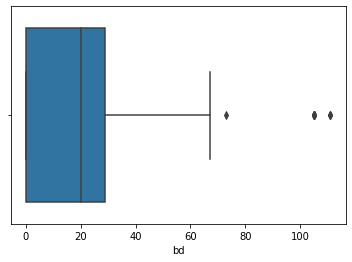

In [ ]:
sns.boxplot(msongs.bd)

In [ ]:
msongs['bd'].fillna(msongs['bd'].mode(), inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


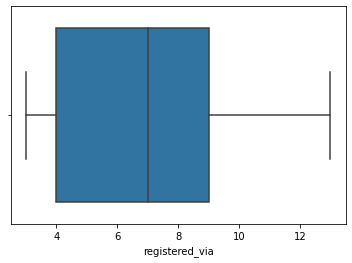

In [ ]:
sns.boxplot(msongs.registered_via)

In [ ]:
msongs['registered_via'].fillna(msongs['registered_via'].mean(), inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


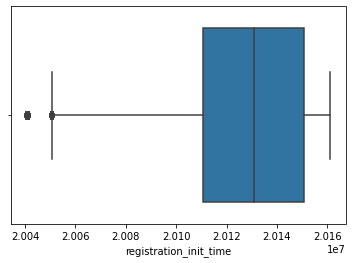

In [ ]:
sns.boxplot(msongs.registration_init_time)

In [ ]:
msongs['registration_init_time'].fillna(msongs['registration_init_time'].mean(), inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


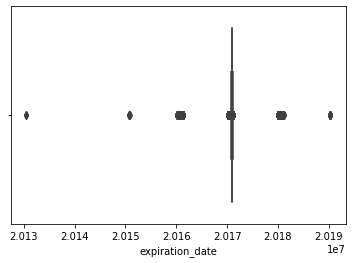

In [ ]:
sns.boxplot(msongs.expiration_date)

In [ ]:
msongs['expiration_date'].fillna(msongs['expiration_date'].mode(), inplace = True)

In [ ]:
print(msongs.isnull().sum())

msno                         0
song_id                      0
source_system_tab           51
source_screen_name         679
source_type                 41
target                       2
song_length                  0
genre_ids                  287
artist_name                  2
composer                  3404
lyricist                  6418
language                     0
name                         2
isrc                      1214
city                         0
bd                           1
gender                    6458
registered_via               0
registration_init_time       0
expiration_date              1
dtype: int64


In [ ]:
msongs['song_id'].fillna(msongs['song_id'].mode()[0], inplace = True)
msongs['source_system_tab'].fillna(msongs['source_system_tab'].mode()[0], inplace = True)
msongs['source_screen_name'].fillna(msongs['source_screen_name'].mode()[0], inplace = True)
msongs['source_type'].fillna(msongs['source_type'].mode()[0], inplace = True)
msongs['genre_ids'].fillna(msongs['genre_ids'].mode()[0], inplace = True)
msongs['artist_name'].fillna(msongs['artist_name'].mode()[0], inplace = True)
msongs['composer'].fillna(msongs['composer'].mode()[0], inplace = True)
msongs['lyricist'].fillna(msongs['lyricist'].mode()[0], inplace = True)
msongs['name'].fillna(msongs['name'].mode()[0], inplace = True)
msongs['isrc'].fillna(msongs['isrc'].mode()[0], inplace = True)
msongs['gender'].fillna(msongs['gender'].mode()[0], inplace = True)
msongs['expiration_date'].fillna(msongs['expiration_date'].mode()[0], inplace = True)
msongs['target'].fillna(6, inplace = True)
msongs['bd'].fillna(6, inplace = True)


In [ ]:
print(msongs.isnull().sum())

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
name                      0
isrc                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64


Normalization

---



---



In [ ]:
cateogry_columns=msongs.select_dtypes(include=['object']).columns.tolist()

In [ ]:
le = LabelEncoder()
ohe = OneHotEncoder()
for i in cateogry_columns:
  msongs[i] = le.fit_transform(msongs[i])

EDA

In [ ]:
msongs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200162 entries, 0 to 1200161
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   msno                    1200162 non-null  int64  
 1   song_id                 1200162 non-null  int64  
 2   source_system_tab       1200162 non-null  int64  
 3   source_screen_name      1200162 non-null  int64  
 4   source_type             1200162 non-null  int64  
 5   target                  1200162 non-null  float64
 6   song_length             1200162 non-null  float64
 7   genre_ids               1200162 non-null  int64  
 8   artist_name             1200162 non-null  int64  
 9   composer                1200162 non-null  int64  
 10  lyricist                1200162 non-null  int64  
 11  language                1200162 non-null  float64
 12  name                    1200162 non-null  int64  
 13  isrc                    1200162 non-null  int64  
 14  ci

In [ ]:
msongs.describe()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
count,15683.000000,15683.000000,15683.000000,15683.000000,15683.000000,15683.000000,1.568300e+04,15683.000000,15683.000000,15683.000000,15683.000000,15683.000000,15683.000000,15683.000000,15683.000000,15683.000000,15683.000000,15683.000000,1.568300e+04,1.568300e+04
mean,1335.976153,4134.337882,3.516100,7.171778,3.971562,0.673022,2.467726e+05,56.656635,1297.542817,2215.961806,1373.719633,17.915322,3937.087675,3928.647835,7.462377,16.851623,0.282471,6.777197,2.012810e+07,2.017174e+07
std,730.934064,2414.533916,1.546802,2.722736,1.803002,0.473184,6.822584e+04,18.604198,649.634004,954.732809,491.997191,20.932949,2117.796658,1944.111162,6.568944,15.631835,0.450216,2.241729,2.854231e+04,3.802233e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.421000e+04,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,2.004033e+07,2.013041e+07
25%,733.000000,2034.500000,3.000000,7.000000,3.000000,0.000000,2.151990e+05,58.000000,788.000000,1520.500000,1282.000000,3.000000,2145.500000,2469.500000,1.000000,0.000000,0.000000,4.000000,2.011081e+07,2.017091e+07
50%,1373.000000,4063.000000,4.000000,7.000000,3.000000,1.000000,2.439830e+05,60.000000,1440.000000,2672.000000,1518.000000,3.000000,4107.000000,4159.000000,5.000000,20.000000,0.000000,7.000000,2.013091e+07,2.017092e+07
75%,1937.000000,6206.500000,4.000000,7.000000,5.000000,1.000000,2.733450e+05,60.000000,1806.000000,2820.000000,1518.000000,31.000000,5713.500000,5428.000000,13.000000,29.000000,1.000000,9.000000,2.015092e+07,2.017101e+07
max,2637.000000,8345.000000,8.000000,16.000000,10.000000,6.000000,3.600114e+06,108.000000,2277.000000,3544.000000,2228.000000,59.000000,7498.000000,7190.000000,22.000000,111.000000,1.000000,13.000000,2.016121e+07,2.019031e+07


In [ ]:
print('Duplicate values: ',msongs.duplicated().sum())

Duplicate values:  0


In [ ]:
print(msongs.corr())

                            msno   song_id  source_system_tab  \
msno                    1.000000  0.009812          -0.000103   
song_id                 0.009812  1.000000          -0.007620   
source_system_tab      -0.000103 -0.007620           1.000000   
source_screen_name      0.023955 -0.011152           0.003265   
source_type             0.010874  0.012921          -0.084298   
target                 -0.027071 -0.012446           0.087259   
song_length            -0.000599 -0.021146           0.018653   
genre_ids              -0.002758  0.018706           0.032825   
artist_name             0.023012 -0.019297           0.020544   
composer                0.004290 -0.037117           0.037227   
lyricist                0.009264 -0.058105           0.022460   
language               -0.024626  0.006273          -0.052108   
name                    0.023105 -0.018990           0.024589   
isrc                    0.022935 -0.039570          -0.029827   
city                    0

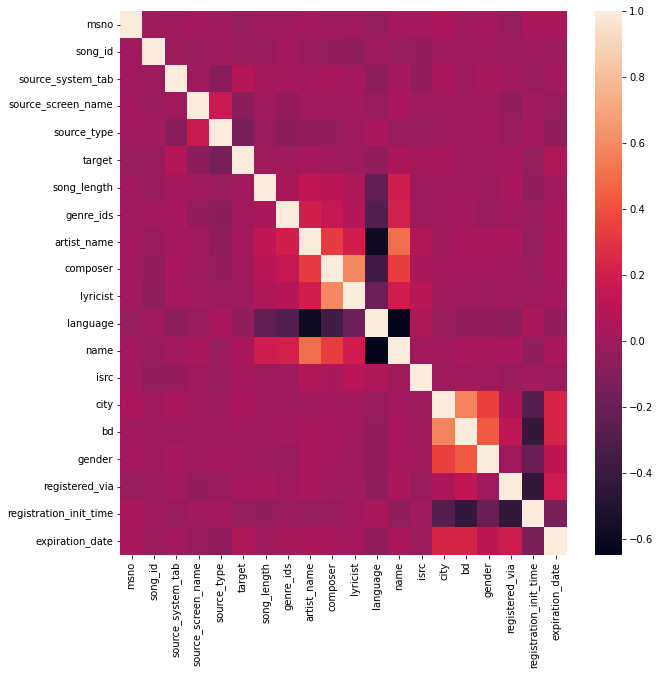

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(msongs.corr())

Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


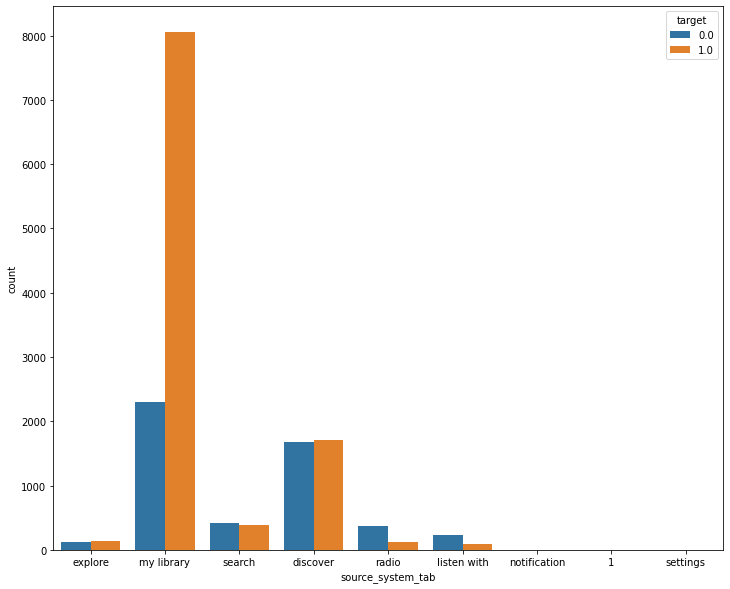

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(train['source_system_tab'],hue=train['target'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'online-playlist'),
 Text(0, 0, 'local-playlist'),
 Text(0, 0, 'local-library'),
 Text(0, 0, 'top-hits-for-artist'),
 Text(0, 0, 'album'),
 Text(0, 0, 'song-based-playlist'),
 Text(0, 0, 'radio'),
 Text(0, 0, 'song'),
 Text(0, 0, 'listen-with'),
 Text(0, 0, 'artist'),
 Text(0, 0, 'topic-article-playlist')]

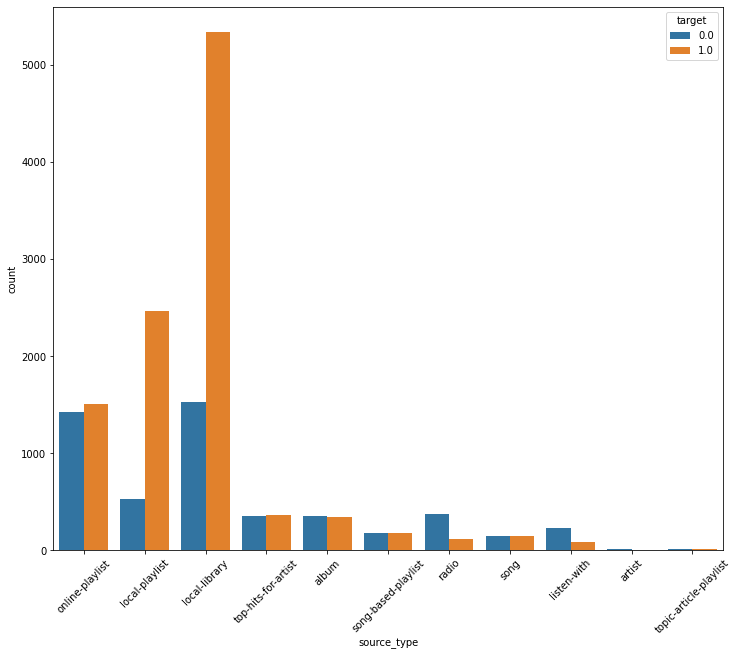

In [ ]:
plt.figure(figsize=(12,10))
g=sns.countplot(train['source_type'],hue=train['target'])
locs, labels = plt.xticks()
g.set_xticklabels(labels,rotation=45)

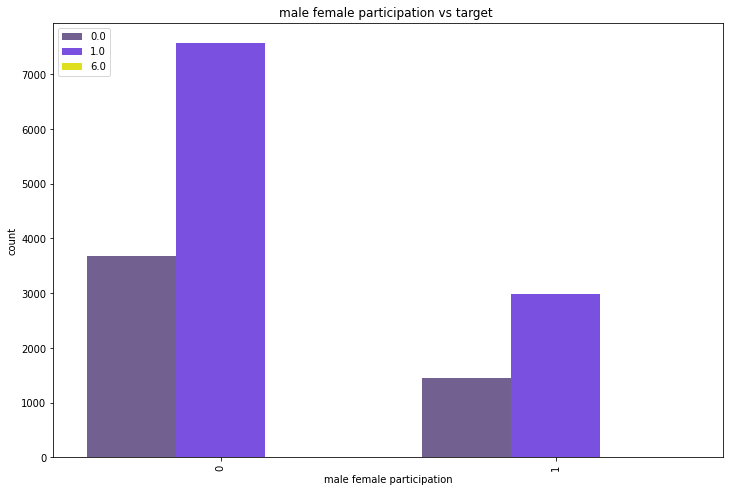

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(x="gender",data=msongs,palette=['#705898','#7038F8','yellow'],hue="target")
plt.xlabel("male female participation")
plt.ylabel("count")
plt.title("male female participation vs target ")
plt.xticks(rotation='90')
plt.legend(loc='upper left')
plt.show()

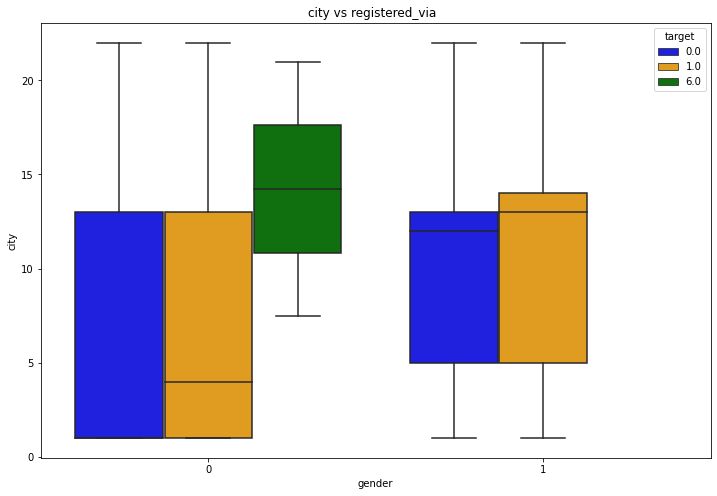

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.boxplot(x="gender",y="city",data=msongs,palette=['blue','orange','green'],hue="target")
plt.xlabel("gender")
plt.ylabel("city")
plt.title("city vs registered_via  ")
plt.show()

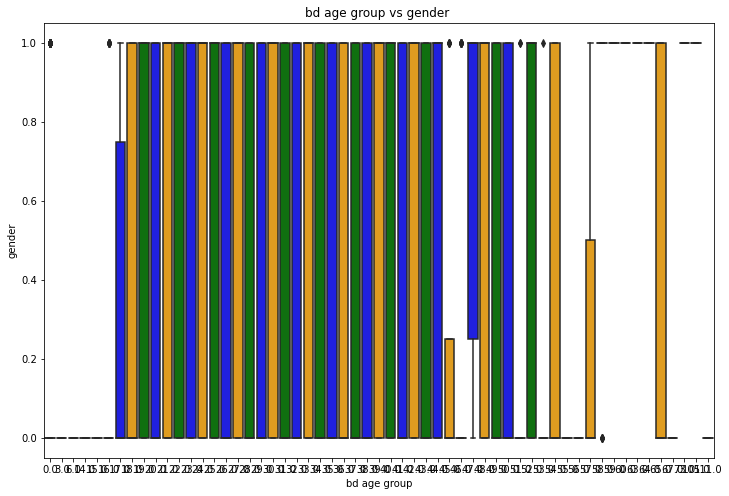

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.boxplot(x="bd",y="gender",data=msongs,palette=['blue','orange','green'])
plt.xlabel("bd age group")
plt.ylabel("gender")
plt.title("bd age group vs gender ")
plt.show()

# Model Selection



In [ ]:
X = msongs.drop('target', axis = 1)
y = msongs.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
## 1) K-Nearest-Neighbours

from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train,Y_train)

knn_pred = knn_model.predict(X_test)
Knn_preds = pd.DataFrame({"Predicted":knn_pred,"Actual":Y_test})
Knn_preds



,Predicted,Actual
2267,1.0,1.0
12290,1.0,1.0
13470,1.0,1.0
13763,1.0,1.0
1870,1.0,0.0
...,...,...
9682,1.0,1.0
2175,0.0,1.0
2876,1.0,1.0
5578,1.0,1.0


In [ ]:
Knn_TP = len(Knn_preds[(Knn_preds["Predicted"]==Knn_preds["Actual"])&(Knn_preds["Predicted"]==1)])
Knn_FP = len(Knn_preds[(Knn_preds["Predicted"]!=Knn_preds["Actual"])&(Knn_preds["Predicted"]==1)])
Knn_FN = len(Knn_preds[(Knn_preds["Predicted"]!=Knn_preds["Actual"])&(Knn_preds["Predicted"]==0)])
Knn_TN = len(Knn_preds[(Knn_preds["Predicted"]==Knn_preds["Actual"])&(Knn_preds["Predicted"]==0)])
print(Knn_TP,Knn_FP,Knn_FN,Knn_TN)
print("Rightly Classified: ",(Knn_TP+Knn_TN),"/",(Knn_TP+Knn_FP+Knn_FN+Knn_TN))
print("Wrongly Classified: ",(Knn_FP+Knn_FN),"/",(Knn_TP+Knn_FP+Knn_FN+Knn_TN))



1992 961 610 358
Rightly Classified:  2350 / 3921
Wrongly Classified:  1571 / 3921


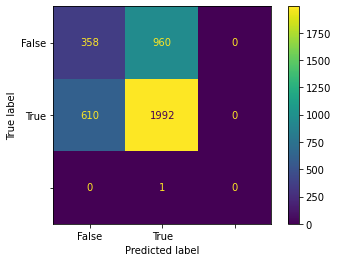


Accuracy on using  KNN algorithm is:  59.93369038510584


In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, knn_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
knn_accuracy = accuracy_score(knn_pred, Y_test)
print('\nAccuracy on using  KNN algorithm is: ',knn_accuracy*100);

In [ ]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

         0.0       0.37      0.27      0.31      1318
         1.0       0.67      0.77      0.72      2602
         6.0       0.00      0.00      0.00         1

    accuracy                           0.60      3921
   macro avg       0.35      0.35      0.34      3921
weighted avg       0.57      0.60      0.58      3921



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##KNN (k=10)

In [ ]:

KNN_model1 = KNeighborsClassifier(n_neighbors=10)
KNN_model1.fit(X_train,Y_train)
KNN_y_preds = KNN_model1.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":Y_test})
KNN_preds

,Predicted,Actual
2267,1.0,1.0
12290,1.0,1.0
13470,1.0,1.0
13763,0.0,1.0
1870,1.0,0.0
...,...,...
9682,1.0,1.0
2175,1.0,1.0
2876,1.0,1.0
5578,1.0,1.0


In [ ]:
KNN_TP1 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP1 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN1 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN1 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP1,KNN_FP1,KNN_FN1,KNN_TN1)
print("Rightly Classified: ",(KNN_TP1+KNN_TN1),"/",(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1))
print("Wrongly Classified: ",(KNN_FP1+KNN_FN1),"/",(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1))

KNN_Accuracy1 = (KNN_TP1+KNN_TN1)/(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1)
KNN_Precision1 = (KNN_TP1)/(KNN_TP1+KNN_FP1)
KNN_Recall1 = (KNN_TP1)/(KNN_TP1+KNN_FN1)
KNN_Specificity1 = (KNN_TN1)/(KNN_TN1+KNN_FP1)
KNN_F11 = (2*KNN_Precision1*KNN_Recall1)/(KNN_Precision1+KNN_Recall1)

2140 1006 462 313
Rightly Classified:  2453 / 3921
Wrongly Classified:  1468 / 3921


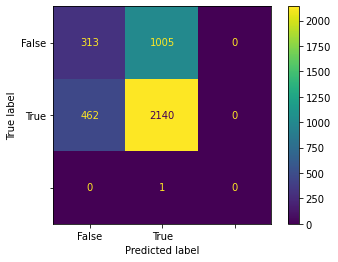

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, KNN_y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


In [ ]:

print(classification_report(Y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.40      0.24      0.30      1318
         1.0       0.68      0.82      0.74      2602
         6.0       0.00      0.00      0.00         1

    accuracy                           0.63      3921
   macro avg       0.36      0.35      0.35      3921
weighted avg       0.59      0.63      0.59      3921



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 #KNN (k=50) 

In [ ]:
KNN_model2 = KNeighborsClassifier(n_neighbors=50)
KNN_model2.fit(X_train,Y_train)
KNN_y_preds = KNN_model2.predict(X_test)
KNN_preds = pd.DataFrame({"Predicted":KNN_y_preds,"Actual":Y_test})
KNN_preds

,Predicted,Actual
2267,1.0,1.0
12290,1.0,1.0
13470,1.0,1.0
13763,1.0,1.0
1870,1.0,0.0
...,...,...
9682,1.0,1.0
2175,1.0,1.0
2876,1.0,1.0
5578,1.0,1.0


In [ ]:
KNN_TP2 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FP2 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==1)])
KNN_FN2 = len(KNN_preds[(KNN_preds["Predicted"]!=KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
KNN_TN2 = len(KNN_preds[(KNN_preds["Predicted"]==KNN_preds["Actual"])&(KNN_preds["Predicted"]==0)])
print(KNN_TP2,KNN_FP2,KNN_FN2,KNN_TN2)
print("Rightly Classified: ",(KNN_TP2+KNN_TN2),"/",(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2))
print("Wrongly Classified: ",(KNN_FP2+KNN_FN2),"/",(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2))

KNN_Accuracy2 = (KNN_TP2+KNN_TN2)/(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2)
KNN_Precision2 = (KNN_TP2)/(KNN_TP2+KNN_FP2)
KNN_Recall2 = (KNN_TP2)/(KNN_TP2+KNN_FN2)
KNN_Specificity2 = (KNN_TN2)/(KNN_TN2+KNN_FP2)
KNN_F12 = (2*KNN_Precision2*KNN_Recall2)/(KNN_Precision2+KNN_Recall2)

2519 1247 83 72
Rightly Classified:  2591 / 3921
Wrongly Classified:  1330 / 3921


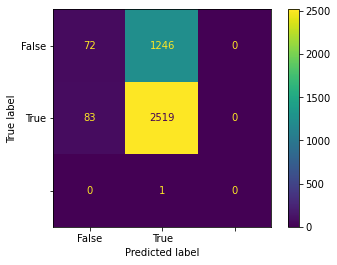

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, KNN_y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, KNN_y_preds))

              precision    recall  f1-score   support

         0.0       0.46      0.05      0.10      1318
         1.0       0.67      0.97      0.79      2602
         6.0       0.00      0.00      0.00         1

    accuracy                           0.66      3921
   macro avg       0.38      0.34      0.30      3921
weighted avg       0.60      0.66      0.56      3921



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# For K=50, the KNN algorithm performs well for the dataset than for k=10

In [ ]:
## 2) Naive Bayes Model

from sklearn.naive_bayes import GaussianNB

nav_bayes_model = GaussianNB()

nav_bayes_model.fit(X_train, Y_train)

nav_bayes_pred = nav_bayes_model.predict(X_test)
Nav_preds = pd.DataFrame({"Predicted":nav_bayes_pred,"Actual":Y_test})
Nav_preds


,Predicted,Actual
2267,1.0,1.0
12290,1.0,1.0
13470,1.0,1.0
13763,1.0,1.0
1870,1.0,0.0
...,...,...
9682,1.0,1.0
2175,1.0,1.0
2876,1.0,1.0
5578,1.0,1.0


In [ ]:
NAV_TP = len(Nav_preds[(Nav_preds["Predicted"]==Nav_preds["Actual"])&(Nav_preds["Predicted"]==1)])
NAV_FP = len(Nav_preds[(Nav_preds["Predicted"]!=Nav_preds["Actual"])&(Nav_preds["Predicted"]==1)])
NAV_FN = len(Nav_preds[(Nav_preds["Predicted"]!=Nav_preds["Actual"])&(Nav_preds["Predicted"]==0)])
NAV_TN = len(Nav_preds[(Nav_preds["Predicted"]==Nav_preds["Actual"])&(Nav_preds["Predicted"]==0)])
print(NAV_TP,NAV_FP,NAV_FN,NAV_TN)
print("Rightly Classified: ",(NAV_TP+NAV_TN),"/",(NAV_TP+NAV_FP+NAV_FN+NAV_TN))
print("Wrongly Classified: ",(NAV_FP+NAV_FN),"/",(NAV_TP+NAV_FP+NAV_FN+NAV_TN))
NAV_Accuracy = (NAV_TP+NAV_TN)/(NAV_TP+NAV_FP+NAV_FN+NAV_TN)
NAV_Precision = (NAV_TP)/(NAV_TP+NAV_FP)
NAV_Recall = (NAV_TP)/(NAV_TP+NAV_FN)
NAV_Specificity = (NAV_TN)/(NAV_TN+NAV_FP)
NAV_F1 = (2*NAV_Precision*NAV_Recall)/(NAV_Precision+NAV_Recall)


2456 1106 146 213
Rightly Classified:  2669 / 3921
Wrongly Classified:  1252 / 3921


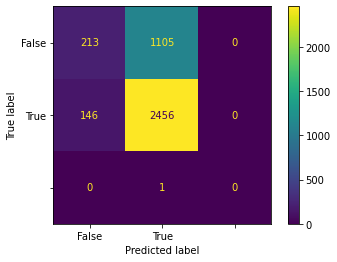


Accuracy on using Navie Bayes model is:  68.0693700586585


In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, nav_bayes_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
nav_bayes_accuracy = accuracy_score(nav_bayes_pred, Y_test)
print('\nAccuracy on using Navie Bayes model is: ',nav_bayes_accuracy*100)

In [ ]:
print(classification_report(Y_test, nav_bayes_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.16      0.25      1318
         1.0       0.69      0.94      0.80      2602
         6.0       0.00      0.00      0.00         1

    accuracy                           0.68      3921
   macro avg       0.43      0.37      0.35      3921
weighted avg       0.66      0.68      0.61      3921



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## 3) Logistic Regression
log_reg_model = LogisticRegression()

log_reg_model.fit(X_train, Y_train)

log_reg_pred = log_reg_model.predict(X_test)
Log_preds = pd.DataFrame({"Predicted":log_reg_pred,"Actual":Y_test})
Log_preds


,Predicted,Actual
2267,1.0,1.0
12290,1.0,1.0
13470,1.0,1.0
13763,1.0,1.0
1870,1.0,0.0
...,...,...
9682,1.0,1.0
2175,1.0,1.0
2876,1.0,1.0
5578,1.0,1.0


In [ ]:
Log_TP = len(Log_preds[(Log_preds["Predicted"]==Log_preds["Actual"])&(Log_preds["Predicted"]==1)])
Log_FP = len(Log_preds[(Log_preds["Predicted"]!=Log_preds["Actual"])&(Log_preds["Predicted"]==1)])
Log_FN = len(Log_preds[(Log_preds["Predicted"]!=Log_preds["Actual"])&(Log_preds["Predicted"]==0)])
Log_TN = len(Log_preds[(Log_preds["Predicted"]==Log_preds["Actual"])&(Log_preds["Predicted"]==0)])
print(Log_TP,Log_FP,Log_FN,Log_TN)
print("Rightly Classified: ",(Log_TP+Log_TN),"/",(Log_TP+Log_FP+Log_FN+Log_TN))
print("Wrongly Classified: ",(Log_FP+Log_FN),"/",(Log_TP+Log_FP+Log_FN+Log_TN))
Log_Accuracy = (Log_TP+Log_TN)/(Log_TP+Log_TN+Log_FP+Log_FN)
Log_Precision = (Log_TP)/(Log_TP+Log_FP)
Log_Recall = (Log_TP)/(Log_TP+Log_FN)
Log_Specificity = (Log_TN)/(Log_TN+Log_FP)
Log_F1 = (2*Log_Precision*Log_Recall)/(Log_Precision+Log_Recall)

2602 1319 0 0
Rightly Classified:  2602 / 3921
Wrongly Classified:  1319 / 3921


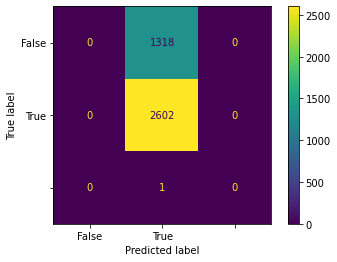


Accuracy on using Logistic Regression algorithm is:  66.36062229023209


In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, log_reg_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
log_reg_accuracy = accuracy_score(log_reg_pred, Y_test)
print('\nAccuracy on using Logistic Regression algorithm is: ',log_reg_accuracy*100)

In [ ]:
print(classification_report(Y_test, log_reg_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1318
         1.0       0.66      1.00      0.80      2602
         6.0       0.00      0.00      0.00         1

    accuracy                           0.66      3921
   macro avg       0.22      0.33      0.27      3921
weighted avg       0.44      0.66      0.53      3921



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## 4) Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

dec_tree_model = DecisionTreeClassifier()

dec_tree_model.fit(X_train, Y_train)

dec_tree_pred = dec_tree_model.predict(X_test)
Decision_tree_preds = pd.DataFrame({"Predicted":dec_tree_pred,"Actual":Y_test})
Decision_tree_preds


,Predicted,Actual
2267,1.0,1.0
12290,0.0,1.0
13470,1.0,1.0
13763,1.0,1.0
1870,1.0,0.0
...,...,...
9682,1.0,1.0
2175,1.0,1.0
2876,0.0,1.0
5578,1.0,1.0


In [ ]:
Decision_TP = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]==Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==1)])
Decision_FP = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]!=Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==1)])
Decision_FN = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]!=Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==0)])
Decision_TN = len(Decision_tree_preds[(Decision_tree_preds["Predicted"]==Decision_tree_preds["Actual"])&(Decision_tree_preds["Predicted"]==0)])
print(Decision_TP,Decision_FP,Decision_FN,Decision_TN)
print("Rightly Classified: ",(Decision_TP+Decision_TN),"/",(Decision_TP+Decision_FP+Decision_FN+Decision_TN))
print("Wrongly Classified: ",(Decision_FP+Decision_FN),"/",(Decision_TP+Decision_FP+Decision_FN+Decision_TN))
Decision_Accuracy = (Decision_TP+Decision_TN)/(Decision_TP+Decision_TN+Decision_FP+Decision_FN)
Decision_Precision = (Decision_TP)/(Decision_TP+Decision_FP)
Decision_Recall = (Decision_TP)/(Decision_TP+Decision_FN)
Decision_Specificity = (Decision_TN)/(Decision_TN+Decision_FP)
Decision_F1 = (2*Decision_Precision*Decision_Recall)/(Decision_Precision+Decision_Recall)

2064 599 538 720
Rightly Classified:  2784 / 3921
Wrongly Classified:  1137 / 3921


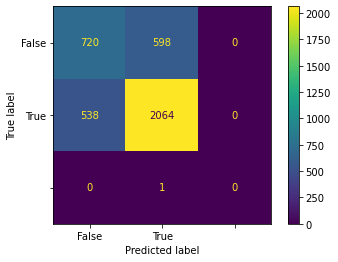


Accuracy on using Decision Tree model is:  71.00229533282327


In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, dec_tree_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
dec_tree_accuracy = accuracy_score(dec_tree_pred, Y_test)
print('\nAccuracy on using Decision Tree model is: ',dec_tree_accuracy*100);

In [ ]:
print(classification_report(Y_test,dec_tree_pred ))

              precision    recall  f1-score   support

         0.0       0.57      0.55      0.56      1318
         1.0       0.78      0.79      0.78      2602
         6.0       0.00      0.00      0.00         1

    accuracy                           0.71      3921
   macro avg       0.45      0.45      0.45      3921
weighted avg       0.71      0.71      0.71      3921



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## 5) Random Forest 

from sklearn.ensemble import RandomForestClassifier

rand_forest_model= RandomForestClassifier(max_depth=2)

rand_forest_model.fit(X_train,Y_train)

rand_forest_pred = rand_forest_model.predict(X_test)
RF_preds = pd.DataFrame({"Predicted":rand_forest_pred,"Actual":Y_test})
RF_preds

,Predicted,Actual
2267,1.0,1.0
12290,1.0,1.0
13470,1.0,1.0
13763,1.0,1.0
1870,1.0,0.0
...,...,...
9682,1.0,1.0
2175,1.0,1.0
2876,1.0,1.0
5578,1.0,1.0


In [ ]:
RF_TP1 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP1 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN1 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN1 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RF_TP1,RF_FP1,RF_FN1,RF_TN1)
print("Rightly Classified: ",(RF_TP1+RF_TN1),"/",(RF_TP1+RF_FP1+RF_FN1+RF_TN1))
print("Wrongly Classified: ",(RF_FP1+RF_FN1),"/",(RF_TP1+RF_FP1+RF_FN1+RF_TN1))
RF_Accuracy1 = (RF_TP1+RF_TN1)/(RF_TP1+RF_FP1+RF_FN1+RF_TN1)
RF_Precision1 = (RF_TP1)/(RF_TP1+RF_FP1)
RF_Recall1 = (RF_TP1)/(RF_TP1+RF_FN1)
RF_Specificity1 = (RF_TN1)/(RF_TN1+RF_FP1)
RF_F11 = (2*RF_Precision1*RF_Recall1)/(RF_Precision1+RF_Recall1)


2564 1218 38 101
Rightly Classified:  2665 / 3921
Wrongly Classified:  1256 / 3921


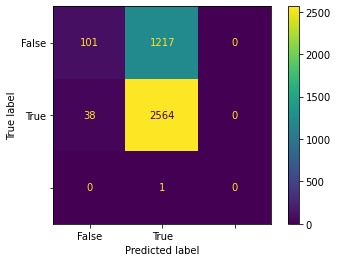


Accuracy on using Random Forest algorithm is:  67.96735526651364


In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, rand_forest_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
rand_forest_accuracy = accuracy_score(rand_forest_pred, Y_test)
print('\nAccuracy on using Random Forest algorithm is: ',rand_forest_accuracy*100);

In [ ]:
print(classification_report(Y_test,rand_forest_pred ))

              precision    recall  f1-score   support

         0.0       0.73      0.08      0.14      1318
         1.0       0.68      0.99      0.80      2602
         6.0       0.00      0.00      0.00         1

    accuracy                           0.68      3921
   macro avg       0.47      0.35      0.31      3921
weighted avg       0.69      0.68      0.58      3921



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Random Forest (Max 5 features in Bootstraping)

In [ ]:

RF_model2 = RandomForestClassifier(max_depth=5)
RF_model2.fit(X_train,Y_train)
RF_y_preds = RF_model2.predict(X_test)
RF_preds = pd.DataFrame({"Predicted":RF_y_preds,"Actual":Y_test})
RF_preds

,Predicted,Actual
2267,1.0,1.0
12290,1.0,1.0
13470,1.0,1.0
13763,1.0,1.0
1870,1.0,0.0
...,...,...
9682,1.0,1.0
2175,1.0,1.0
2876,1.0,1.0
5578,1.0,1.0


In [ ]:

RF_TP2 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP2 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN2 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN2 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RF_TP2,RF_FP2,RF_FN2,RF_TN2)
print("Rightly Classified: ",(RF_TP2+RF_TN2),"/",(RF_TP2+RF_FP2+RF_FN2+RF_TN2))
print("Wrongly Classified: ",(RF_FP2+RF_FN2),"/",(RF_TP2+RF_FP2+RF_FN2+RF_TN2))
RF_Accuracy2 = (RF_TP2+RF_TN2)/(RF_TP2+RF_FP2+RF_FN2+RF_TN2)
RF_Precision2 = (RF_TP2)/(RF_TP2+RF_FP2)
RF_Recall2 = (RF_TP2)/(RF_TP2+RF_FN2)
RF_Specificity2 = (RF_TN2)/(RF_TN2+RF_FP2)
RF_F12 = (2*RF_Precision2*RF_Recall2)/(RF_Precision2+RF_Recall2)

2385 880 217 439
Rightly Classified:  2824 / 3921
Wrongly Classified:  1097 / 3921


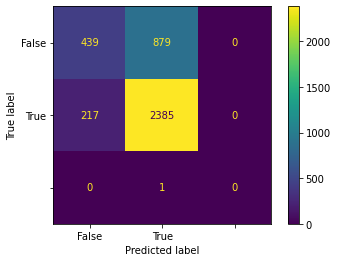

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, RF_y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, RF_y_preds))

              precision    recall  f1-score   support

         0.0       0.67      0.33      0.44      1318
         1.0       0.73      0.92      0.81      2602
         6.0       0.00      0.00      0.00         1

    accuracy                           0.72      3921
   macro avg       0.47      0.42      0.42      3921
weighted avg       0.71      0.72      0.69      3921



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest (Max 10 features in Bootstraping) 

In [ ]:
RF_model3 = RandomForestClassifier(max_depth=10)
RF_model3.fit(X_train,Y_train)
RF_y_preds = RF_model3.predict(X_test)
RF_preds = pd.DataFrame({"Predicted":RF_y_preds,"Actual":Y_test})
RF_preds

,Predicted,Actual
2267,1.0,1.0
12290,1.0,1.0
13470,1.0,1.0
13763,1.0,1.0
1870,1.0,0.0
...,...,...
9682,1.0,1.0
2175,1.0,1.0
2876,1.0,1.0
5578,1.0,1.0


In [ ]:
RF_TP3 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FP3 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==1)])
RF_FN3 = len(RF_preds[(RF_preds["Predicted"]!=RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
RF_TN3 = len(RF_preds[(RF_preds["Predicted"]==RF_preds["Actual"])&(RF_preds["Predicted"]==0)])
print(RF_TP3,RF_FP3,RF_FN3,RF_TN3)
print("Rightly Classified: ",(RF_TP3+RF_TN3),"/",(RF_TP3+RF_FP3+RF_FN3+RF_TN3))
print("Wrongly Classified: ",(RF_FP3+RF_FN3),"/",(RF_TP3+RF_FP3+RF_FN3+RF_TN3))

RF_Accuracy3 = (RF_TP3+RF_TN3)/(RF_TP3+RF_FP3+RF_FN3+RF_TN3)
RF_Precision3 = (RF_TP3)/(RF_TP3+RF_FP3)
RF_Recall3 = (RF_TP3)/(RF_TP3+RF_FN3)
RF_Specificity3 = (RF_TN3)/(RF_TN3+RF_FP3)
RF_F13 = (2*RF_Precision3*RF_Recall3)/(RF_Precision3+RF_Recall3)

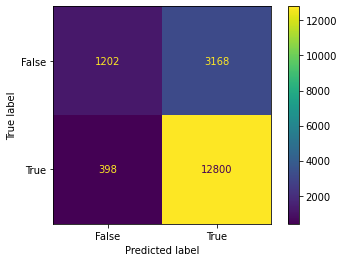

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, RF_y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, RF_y_preds))

              precision    recall  f1-score   support

         0.0       0.75      0.28      0.40      4370
         1.0       0.80      0.97      0.88     13198

    accuracy                           0.80     17568
   macro avg       0.78      0.62      0.64     17568
weighted avg       0.79      0.80      0.76     17568



######SVM (Support Vector Machine)

In [ ]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train,Y_train)
SVM_y_preds = SVM_model.predict(X_test)
SVM_preds = pd.DataFrame({"Predicted":SVM_y_preds,"Actual":Y_test})
SVM_preds

,Predicted,Actual
21617,1.0,0.0
34029,1.0,1.0
34957,1.0,1.0
24416,1.0,1.0
17811,1.0,0.0
...,...,...
21055,1.0,1.0
12308,1.0,1.0
61307,1.0,0.0
31571,1.0,1.0


In [ ]:
SVM_TP = len(SVM_preds[(SVM_preds["Predicted"]==SVM_preds["Actual"])&(SVM_preds["Predicted"]==1)])
SVM_FP = len(SVM_preds[(SVM_preds["Predicted"]!=SVM_preds["Actual"])&(SVM_preds["Predicted"]==1)])
SVM_FN = len(SVM_preds[(SVM_preds["Predicted"]!=SVM_preds["Actual"])&(SVM_preds["Predicted"]==0)])
SVM_TN = len(SVM_preds[(SVM_preds["Predicted"]==SVM_preds["Actual"])&(SVM_preds["Predicted"]==0)])
print(SVM_TP,SVM_FP,SVM_FN,SVM_TN)
print("Rightly Classified: ",(SVM_TP+SVM_TN),"/",(SVM_TP+SVM_FP+SVM_FN+SVM_TN))
print("Wrongly Classified: ",(SVM_FP+SVM_FN),"/",(SVM_TP+SVM_FP+SVM_FN+SVM_TN))

SVM_Accuracy = (SVM_TP+SVM_TN)/(SVM_TP+SVM_FP+SVM_FN+SVM_TN)
SVM_Precision = (SVM_TP)/(SVM_TP+SVM_FP)
SVM_Recall = (SVM_TP)/(SVM_TP+SVM_FN)
SVM_Specificity = (SVM_TN)/(SVM_TN+SVM_FP)
SVM_F1 = (2*SVM_Precision*SVM_Recall)/(SVM_Precision+SVM_Recall)

13198 4370 0 0
Rightly Classified:  13198 / 17568
Wrongly Classified:  4370 / 17568


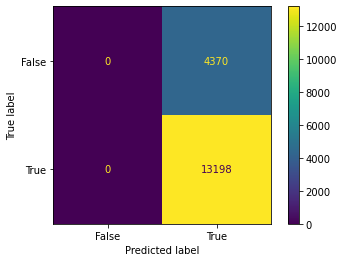

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, SVM_y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, SVM_y_preds))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1318
         1.0       0.66      1.00      0.80      2602
         6.0       0.00      0.00      0.00         1

    accuracy                           0.66      3921
   macro avg       0.22      0.33      0.27      3921
weighted avg       0.44      0.66      0.53      3921



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###LGBM_model

In [ ]:
from lightgbm import *
LGBM_model = LGBMClassifier()
LGBM_model.fit(X_train, Y_train)
LGBM_y_preds = LGBM_model.predict(X_test)
LGBM_preds = pd.DataFrame({"Predicted":LGBM_y_preds,"Actual":Y_test})
LGBM_preds

,Predicted,Actual
2267,1.0,1.0
12290,1.0,1.0
13470,1.0,1.0
13763,1.0,1.0
1870,1.0,0.0
...,...,...
9682,1.0,1.0
2175,1.0,1.0
2876,1.0,1.0
5578,1.0,1.0


In [ ]:
LGBM_TP = len(LGBM_preds[(LGBM_preds["Predicted"]==LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==1)])
LGBM_FP = len(LGBM_preds[(LGBM_preds["Predicted"]!=LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==1)])
LGBM_FN = len(LGBM_preds[(LGBM_preds["Predicted"]!=LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==0)])
LGBM_TN = len(LGBM_preds[(LGBM_preds["Predicted"]==LGBM_preds["Actual"])&(LGBM_preds["Predicted"]==0)])
print(LGBM_TP,LGBM_FP,LGBM_FN,LGBM_TN)
print("Rightly Classified: ",(LGBM_TP+LGBM_TN),"/",(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN))
print("Wrongly Classified: ",(LGBM_FP+LGBM_FN),"/",(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN))

LGBM_Accuracy = (LGBM_TP+LGBM_TN)/(LGBM_TP+LGBM_TN+LGBM_FP+LGBM_FN)
LGBM_Precision = (LGBM_TP)/(LGBM_TP+LGBM_FP)
LGBM_Recall = (LGBM_TP)/(LGBM_TP+LGBM_FN)
LGBM_Specificity = (LGBM_TN)/(LGBM_TN+LGBM_FP)
LGBM_F1 = (2*LGBM_Precision*LGBM_Recall)/(LGBM_Precision+LGBM_Recall)

2228 713 374 606
Rightly Classified:  2834 / 3921
Wrongly Classified:  1087 / 3921


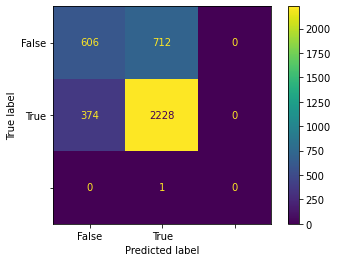

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, LGBM_y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, LGBM_y_preds))

              precision    recall  f1-score   support

         0.0       0.62      0.46      0.53      1318
         1.0       0.76      0.86      0.80      2602
         6.0       0.00      0.00      0.00         1

    accuracy                           0.72      3921
   macro avg       0.46      0.44      0.44      3921
weighted avg       0.71      0.72      0.71      3921



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 ## xgboost

In [ ]:
import xgboost as xgb

XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_train, Y_train)
XGB_y_preds =XGB_model.predict(X_test)
XGB_preds = pd.DataFrame({"Predicted":XGB_y_preds,"Actual":Y_test})
XGB_preds

,Predicted,Actual
2267,1.0,1.0
12290,1.0,1.0
13470,1.0,1.0
13763,1.0,1.0
1870,1.0,0.0
...,...,...
9682,1.0,1.0
2175,1.0,1.0
2876,1.0,1.0
5578,1.0,1.0


In [ ]:
XGB_TP = len(XGB_preds[(XGB_preds["Predicted"]==XGB_preds["Actual"])&(XGB_preds["Predicted"]==1)])
XGB_FP = len(XGB_preds[(XGB_preds["Predicted"]!=XGB_preds["Actual"])&(XGB_preds["Predicted"]==1)])
XGB_FN = len(XGB_preds[(XGB_preds["Predicted"]!=XGB_preds["Actual"])&(XGB_preds["Predicted"]==0)])
XGB_TN = len(XGB_preds[(XGB_preds["Predicted"]==XGB_preds["Actual"])&(XGB_preds["Predicted"]==0)])
print(XGB_TP,XGB_FP,XGB_FN,XGB_TN)
print("Rightly Classified: ",(XGB_TP+XGB_TN),"/",(XGB_TP+XGB_FP+XGB_FN+XGB_TN))
print("Wrongly Classified: ",(XGB_FP+XGB_FN),"/",(XGB_TP+XGB_FP+XGB_FN+XGB_TN))

XGB_Accuracy = (XGB_TP+XGB_TN)/(XGB_TP+XGB_TN+XGB_FP+XGB_FN)
XGB_Precision = (XGB_TP)/(XGB_TP+XGB_FP)
XGB_Recall = (XGB_TP)/(XGB_TP+XGB_FN)
XGB_Specificity = (XGB_TN)/(XGB_TN+XGB_FP)
XGB_F1 = (2*XGB_Precision*XGB_Recall)/(XGB_Precision+XGB_Recall)

2372 818 230 501
Rightly Classified:  2873 / 3921
Wrongly Classified:  1048 / 3921


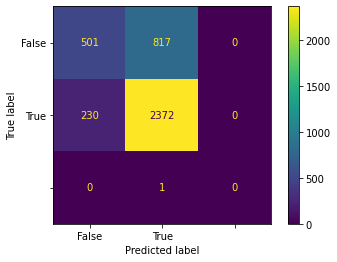

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, XGB_y_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, XGB_y_preds))

              precision    recall  f1-score   support

         0.0       0.69      0.38      0.49      1318
         1.0       0.74      0.91      0.82      2602
         6.0       0.00      0.00      0.00         1

    accuracy                           0.73      3921
   macro avg       0.48      0.43      0.44      3921
weighted avg       0.72      0.73      0.71      3921



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Comparison matrix for methods

In [ ]:
comparison = pd.DataFrame({"ML Classification Algo":["Decision_Tree","LGBM Classifier","XGBoosting","Logistic Regression","Random Forest (Max 5 features in Bootstraping)","Random Forest (Max 10 features in Bootstraping)","Gaussian Naive Bayes","KNN (k=10)","KNN (k=50)","SVM (Support Vector Machine)"],
 "Rightly_Classified":[(Decision_TP+Decision_TN)/(Decision_TP+Decision_FP+Decision_FN+Decision_TN),(LGBM_TP+LGBM_TN)/(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN),(XGB_TP+XGB_TN)/(XGB_TP+XGB_FP+XGB_FN+XGB_TN),(Log_TP+Log_TN)/(Log_TP+Log_FP+Log_FN+Log_TN),(RF_TP2+RF_TN2)/(RF_TP2+RF_FP2+RF_FN2+RF_TN2),(RF_TP3+RF_TN3)/(RF_TP3+RF_FP3+RF_FN3+RF_TN3),(NAV_TP+NAV_TN)/(NAV_TP+NAV_FP+NAV_FN+NAV_TN),(KNN_TP1+KNN_TN1)/(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1),(KNN_TP2+KNN_TN2)/(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2),(SVM_TP+SVM_TN)/(SVM_TP+SVM_FP+SVM_FN+SVM_TN)],
 "Wrongly_Classified":[(Decision_FP+Decision_FN)/(Decision_TP+Decision_FP+Decision_FN+Decision_TN),(LGBM_FP+LGBM_FN)/(LGBM_TP+LGBM_FP+LGBM_FN+LGBM_TN),(XGB_FP+XGB_FN)/(XGB_TP+XGB_FP+XGB_FN+XGB_TN),(Log_FP+Log_FN)/(Log_TP+Log_FP+Log_FN+Log_TN),(RF_FP2+RF_FN2)/(RF_TP2+RF_FP2+RF_FN2+RF_TN2),(RF_FP3+RF_FN3)/(RF_TP3+RF_FP3+RF_FN3+RF_TN3),(NAV_FP+NAV_FN)/(NAV_TP+NAV_FP+NAV_FN+NAV_TN),(KNN_FP1+KNN_FN1)/(KNN_TP1+KNN_FP1+KNN_FN1+KNN_TN1),(KNN_FP2+KNN_FN2)/(KNN_TP2+KNN_FP2+KNN_FN2+KNN_TN2),(SVM_FP+SVM_FN)/(SVM_TP+SVM_FP+SVM_FN+SVM_TN)],
 "Accuracy":[Decision_Accuracy,LGBM_Accuracy,XGB_Accuracy,Log_Accuracy,RF_Accuracy2,RF_Accuracy3,NAV_Accuracy ,KNN_Accuracy1,KNN_Accuracy2,SVM_Accuracy],
  "Precision":[Decision_Precision,LGBM_Precision,XGB_Precision,Log_Precision,RF_Precision2,RF_Precision3,NAV_Precision,KNN_Precision1,KNN_Precision2,SVM_Precision],
  "Recall":[Decision_Recall,LGBM_Recall,XGB_Recall,Log_Recall,RF_Recall2,RF_Recall3,NAV_Recall,KNN_Recall1,KNN_Recall2,SVM_Recall],
  "Specificity":[Decision_Specificity,LGBM_Specificity,XGB_Specificity,Log_Specificity,RF_Specificity2,RF_Specificity3,NAV_Specificity,KNN_Specificity1,KNN_Specificity2,SVM_Specificity],
  "F1-Score":[Decision_F1,LGBM_F1,XGB_F1,Log_F1,RF_F12,RF_F13,NAV_F1,KNN_F11,KNN_F12,SVM_F1]})
comparison.sort_values(by="Accuracy",ascending=False).style.background_gradient(cmap='rocket')


,ML Classification Algo,Rightly_Classified,Wrongly_Classified,Accuracy,Precision,Recall,Specificity,F1-Score
5,Random Forest (Max 10 features in Bootstraping),0.748279,0.251721,0.748279,0.754812,0.919293,0.410917,0.828972
2,XGBoosting,0.732721,0.267279,0.732721,0.743574,0.911606,0.379833,0.819061
1,LGBM Classifier,0.722775,0.277225,0.722775,0.757565,0.856264,0.459439,0.803897
4,Random Forest (Max 5 features in Bootstraping),0.720224,0.279776,0.720224,0.730475,0.916603,0.332828,0.813022
0,Decision_Tree,0.710023,0.289977,0.710023,0.775066,0.793236,0.545868,0.784046
6,Gaussian Naive Bayes,0.680694,0.319306,0.680694,0.689500,0.943889,0.161486,0.796885
3,Logistic Regression,0.663606,0.336394,0.663606,0.663606,1.000000,0.000000,0.797792
9,SVM (Support Vector Machine),0.663606,0.336394,0.663606,0.663606,1.000000,0.000000,0.797792
8,KNN (k=50),0.660801,0.339199,0.660801,0.668879,0.968101,0.054587,0.791143
7,KNN (k=10),0.625606,0.374394,0.625606,0.680229,0.822444,0.237301,0.744607


## As from above table Random Forest (Max 10 features in Bootstraping) has more accuracy and F1 score initially this model is performing well.

## Hyperparameter Tuning

#LGBM Hyperparameter tuning

In [ ]:
#Hyperparametertuning for lgbm using n_estimators, max_depth and learning_rate
from lightgbm import *
n_estimators = [50, 100, 150, 200, 250]
max_depth = [-1,0,1,2]
learning_rate = [0.05,0.1,0.15]
acc = []
for n in n_estimators:
  for d in max_depth:
    for l in learning_rate:
      LGBM_model = LGBMClassifier(n_estimators = n,max_depth=d,learning_rate=l)
      LGBM_model.fit(X_train, Y_train)
      LGBM_y_preds = LGBM_model.predict(X_test)
      LGBM_y_accuracy = accuracy_score(LGBM_y_preds,Y_test)
      acc.append(LGBM_y_accuracy)
      print(f"n_components = {n}, learning_rate = {l}, max_depth = {d}=> Accuracy : {LGBM_y_accuracy*100}");
LGBM_max = max(acc)

n_components = 50, learning_rate = 0.05, max_depth = -1=> Accuracy : 75.18490181076257
n_components = 50, learning_rate = 0.1, max_depth = -1=> Accuracy : 74.82785003825555
n_components = 50, learning_rate = 0.15, max_depth = -1=> Accuracy : 72.78755419535833
n_components = 50, learning_rate = 0.05, max_depth = 0=> Accuracy : 75.18490181076257
n_components = 50, learning_rate = 0.1, max_depth = 0=> Accuracy : 74.82785003825555
n_components = 50, learning_rate = 0.15, max_depth = 0=> Accuracy : 72.78755419535833
n_components = 50, learning_rate = 0.05, max_depth = 1=> Accuracy : 68.50293292527417
n_components = 50, learning_rate = 0.1, max_depth = 1=> Accuracy : 69.24254016832441
n_components = 50, learning_rate = 0.15, max_depth = 1=> Accuracy : 70.0586585054833
n_components = 50, learning_rate = 0.05, max_depth = 2=> Accuracy : 69.93114001530222
n_components = 50, learning_rate = 0.1, max_depth = 2=> Accuracy : 71.2573323131854
n_components = 50, learning_rate = 0.15, max_depth = 2=> 

In [ ]:
LGBM_max

0.7748023463402194

Best parameters for LGBM are: {n_estimators, max_depth, learning_rate}

The maximum accuracy after performing hyperparameter tuning on LGBM is 77.48 percent.

#XG Boosting Hyperparameter tuning

In [ ]:
#Hyperparametertuning for XGBoosting
from lightgbm import *
eta = [0.1, 0.3, 0.5, 0.7, 0.9]
gamma  = [0,2,5,7,10]
Lambda = [0,1,2,3,10]
xgacc = []
for n in eta:
  for d in gamma:
    for l in Lambda:
      XGB_model = xgb.XGBClassifier(eta = n,gamma=d,Lambda=l)
      XGB_model.fit(X_train, Y_train)
      XGB_y_preds =XGB_model.predict(X_test)
      XGB_accuracy = accuracy_score(XGB_y_preds,Y_test)
      xgacc.append(XGB_accuracy)

XB_max = max(xgacc)

In [ ]:
XB_max

0.7327212445804642

Best parameters for XGboost are: {eta, gamma, Lambda}

The maximum accuracy after performing hyperparameter tuning on XGboost is 73 percent.

#K-Nearest Neighbour Hyperparameter tuning

In [ ]:
#grid search for the parameters n neighbours,p , distance
param_grid = {'n_neighbors':np.arange(1,50), 'p':[1,2], 'metric':['minkowski','euclidean','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=5)
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(grid.best_score_)


{'metric': 'minkowski', 'n_neighbors': 48, 'p': 2}
0.6775213145181576


The best parameters for knn algorithm is:
{'metric': 'minkowski', 'n_neighbors': 48, 'p': 2}

The maximum accuracy after performing hyperparameter tuning is 67.8 percent.

In [ ]:
#Fitting the model with best parameters
knn=KNeighborsClassifier(metric='minkowski', n_neighbors=48, p=2)
knn.fit(X_train,Y_train)
knny_pred=knn.predict(X_test)
knny_pred

array([1., 1., 1., ..., 1., 1., 1.])

#Logistic Hyperparameter tuning

In [ ]:
#grid search for lg model with different parameters
param_grid = {'penalty':['l1','l2','elasticnet','none'], 'dual':[True,False], 'fit_intercept':[True,False], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=5)
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(grid.best_score_)


{'dual': False, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}
0.6772659595074749


The best parameters for logistic regression is:
{'dual': False, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}

The maximum accuracy after performing hyperparameter tuning is 67.7 percent.

In [ ]:
#Fitting the model with best parameters
lg=LogisticRegression(dual=False, fit_intercept=True, penalty='l1', solver='liblinear')
lg.fit(X_train,Y_train)
lgy_pred=lg.predict(X_test)
lgy_pred

array([1., 1., 1., ..., 1., 0., 1.])

#Random Forest Hyperparameter tuning

In [ ]:
#grid search for random forest model with different parameters and use all processors
param_grid = {'criterion':['gini','entropy'], 'max_depth':np.arange(1,5), 'max_features':['auto','sqrt','log2']}
grid = GridSearchCV(RandomForestClassifier(n_jobs=-1),param_grid,refit=True,verbose=0,cv=5)
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(grid.best_score_)


{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2'}
0.7259821735749123


The best parameters for Random Forest is:
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2'}

The maximum accuracy after performing hyperparameter tuning is 72.59 percent.

In [ ]:
#Fitting the model with best parameters
rf=RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2', n_jobs=-1)
rf.fit(X_train,Y_train)
rf_ytest_pred=rf.predict(X_test)
rf_ytest_pred

array([1., 1., 1., ..., 1., 1., 1.])

#Decision Tree Hyperparameter tuning

In [ ]:
#grid search for decision tree model with different parameters and use all processors
param_grid = {'criterion':['gini','entropy'], 'max_depth':np.arange(1,50), 'max_features':['auto','sqrt','log2']}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=0)
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(grid.best_score_)


{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}
0.7304028942643781


The best parameters for Decision Tree is:
{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}

The maximum accuracy after performing hyperparameter tuning is 73.04 percent.

In [ ]:
#Fitting the model with best parameters
dt=DecisionTreeClassifier(criterion='gini', max_depth=9, max_features='auto')
dt.fit(X_train,Y_train)
dt_ytest_pred=dt.predict(X_test)
dt_ytest_pred

array([1., 1., 1., ..., 1., 1., 1.])

#Gaussian Navie Bayes Hyperparameter tuning

In [ ]:
#grid search for naive bayes model with different parameters and use all processors
param_grid = {'var_smoothing':np.logspace(0,-9, num=100)}
grid = GridSearchCV(GaussianNB(),param_grid,refit=True,verbose=0)
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(grid.best_score_)


{'var_smoothing': 1.2328467394420635e-09}
0.6872987444021381


The best parameters for Navie Bayes algorithm is:
{'var_smoothing': 1.2328467394420635e-09}

The maximum accuracy after performing hyperparameter tuning is 68.7 percent.

In [ ]:
#Fitting the model with best parameters
gnb=GaussianNB(var_smoothing=1.2328467394420635e-09)
gnb.fit(X_train,Y_train)
gnby_pred=gnb.predict(X_test)
gnby_pred

array([1., 1., 1., ..., 1., 1., 1.])

## Accuracies after training with parameters(Hyperparameter tuning)

In [ ]:
#Store the new accuracies 
models2 = pd.DataFrame({
        'Model': ['KNN','Logistic Regression', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'SVM', 'LGBM', 'XGBOOST'],
        'Hyper_Tuning': [accuracy_score(Y_test,knny_pred)*100, accuracy_score(Y_test,lgy_pred)*100, accuracy_score(Y_test,rf_ytest_pred)*100, accuracy_score(Y_test,dt_ytest_pred)*100, accuracy_score(Y_test,gnby_pred)*100, accuracy_score(Y_test,SVM_y_preds)*100,LGBM_max*100,XB_max*100],})
df2=models2.sort_values(by='Hyper_Tuning', ascending=False)
df2


,Model,Hyper_Tuning
6,LGBM,77.480235
7,XGBOOST,73.272124
3,Decision Tree,71.767406
2,Random Forest,71.741903
4,Naive Bayes,67.865340
1,Logistic Regression,66.870696
5,SVM,66.411630
0,KNN,66.156593


## Initial accuracy of each model

In [ ]:
models6 = pd.DataFrame({
        'Model': ['KNN','Logistic Regression', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'SVM', 'LGBM', 'XGBOOST'],
        'Initial_accuracy':[KNN_Accuracy1*100,Log_Accuracy*100,RF_Accuracy2*100,Decision_Accuracy*100,NAV_Accuracy*100,SVM_Accuracy*100,LGBM_Accuracy*100,XGB_Accuracy*100]})
df1=models6.sort_values(by='Initial_accuracy', ascending=False)
df1



,Model,Initial_accuracy
7,XGBOOST,73.272124
6,LGBM,72.277480
2,Random Forest,72.022443
3,Decision Tree,71.002295
4,Naive Bayes,68.069370
1,Logistic Regression,66.360622
5,SVM,66.360622
0,KNN,62.560571


After performing the hyperparameter tuning on each algorithm, we found that the accuracy of data trained with LGBM and knn are decreased.

## Dimensionality Reduction

# LGBM boosting

In [ ]:
from sklearn.decomposition import PCA
from lightgbm import *
n_components = [8, 10, 12, 14, 16, 18]
lgbm = []
for n in n_components:

  pca = PCA(n_components=n) # Vary 10 to 8/12..

  X_dimred_train = pca.fit_transform(X_train)
  X_dimred_test = pca.transform(X_test)
  

  LGBM_model = LGBMClassifier()
  LGBM_model.fit(X_dimred_train, Y_train)
  LGBM_y_preds = LGBM_model.predict(X_dimred_test)
  LGBM_y_accuracy = accuracy_score(LGBM_y_preds,Y_test)
  lgbm.append(LGBM_y_accuracy)
  print(f"n_components = {n}=> Accuracy : {LGBM_y_accuracy*100}");
lgmmax=max(lgbm)

n_components = 8=> Accuracy : 68.12037745473094
n_components = 10=> Accuracy : 67.63580719204285
n_components = 12=> Accuracy : 68.50293292527417
n_components = 14=> Accuracy : 69.65059933690385
n_components = 16=> Accuracy : 74.80234634021933
n_components = 18=> Accuracy : 75.05738332058148


# XG boosting

In [ ]:
n_components = [8, 10, 12, 14, 16, 18]
xgboo =[]
import xgboost as xgb


for n in n_components:

  pca = PCA(n_components=n) # Vary 10 to 8/12..

  X_dimred_train = pca.fit_transform(X_train)
  X_dimred_test = pca.transform(X_test)

  XGB_model = xgb.XGBClassifier()
  XGB_model.fit(X_dimred_train, Y_train)
  XGB_y_preds =XGB_model.predict(X_dimred_test)
  XGB_accuracy = accuracy_score(XGB_y_preds,Y_test)
  xgboo.append(XGB_accuracy)
  print(f"n_components = {n} => Accuracy : {XGB_accuracy*100}");
  xgbmax=max(xgboo)

n_components = 8 => Accuracy : 66.97271104310126
n_components = 10 => Accuracy : 67.02371843917369
n_components = 12 => Accuracy : 67.30425911757206
n_components = 14 => Accuracy : 67.66131089007906
n_components = 16 => Accuracy : 72.0734506503443
n_components = 18 => Accuracy : 72.4049987248151


# SVM

In [ ]:
from sklearn.decomposition import PCA
from lightgbm import *
n_components = [8, 10, 12, 14, 16, 18]
svmacc=[]
for n in n_components:

  pca = PCA(n_components=n) # Vary 10 to 8/12..

  X_dimred_train = pca.fit_transform(X_train)
  X_dimred_test = pca.transform(X_test)


  SVM_model = svm.SVC()
  SVM_model.fit(X_dimred_train, Y_train)
  SVM_y_preds = SVM_model.predict(X_dimred_test)
  SVM_y_accuracy = accuracy_score(SVM_y_preds,Y_test)
  svmacc.append(SVM_y_accuracy)
  print(f"n_components = {n}=> Accuracy : {SVM_y_accuracy*100}");
svm_accmax=max(svmacc)

n_components = 8=> Accuracy : 66.41162968630452
n_components = 10=> Accuracy : 66.41162968630452
n_components = 12=> Accuracy : 66.41162968630452
n_components = 14=> Accuracy : 66.41162968630452
n_components = 16=> Accuracy : 66.41162968630452
n_components = 18=> Accuracy : 66.41162968630452


# Random_Forest

In [ ]:
from sklearn.decomposition import PCA
from lightgbm import *
n_components = [8, 10, 12, 14, 16, 18]
rfacc=[]
for n in n_components:

  pca = PCA(n_components=n) # Vary 10 to 8/12..

  X_dimred_train = pca.fit_transform(X_train)
  X_dimred_test = pca.transform(X_test)

  rand_forest_model= RandomForestClassifier()
  rand_forest_model.fit(X_dimred_train, Y_train)
  rand_forest_pred = rand_forest_model.predict(X_dimred_test)
  rand_accuracy = accuracy_score(rand_forest_pred,Y_test)
  rfacc.append(rand_accuracy)
  print(f"n_components = {n}=> Accuracy : {rand_accuracy*100}");
rffaccmax=max(rfacc)

n_components = 8=> Accuracy : 67.58479979597041
n_components = 10=> Accuracy : 67.15123692935475
n_components = 12=> Accuracy : 69.08951798010712
n_components = 14=> Accuracy : 70.03315480744709
n_components = 16=> Accuracy : 75.92450905381281
n_components = 18=> Accuracy : 76.51109410864575


# Decision trees

In [ ]:
from sklearn.decomposition import PCA
from lightgbm import *
n_components = [8, 10, 12, 14, 16, 18]
dtr=[]
for n in n_components:

  pca = PCA(n_components=n) # Vary 10 to 8/12..

  X_dimred_train = pca.fit_transform(X_train)
  X_dimred_test = pca.transform(X_test)

  dec_tree_model = DecisionTreeClassifier()

  dec_tree_model.fit(X_dimred_train, Y_train)

  dec_tree_pred = dec_tree_model.predict(X_dimred_test)
  dec_accuracy = accuracy_score(dec_tree_pred,Y_test)
  dtr.append(dec_accuracy)
  print(f"n_components = {n}=> Accuracy : {dec_accuracy*100}");
dtrmax=max(dtr)

n_components = 8=> Accuracy : 58.91354246365723
n_components = 10=> Accuracy : 59.24509053812803
n_components = 12=> Accuracy : 62.7135934710533
n_components = 14=> Accuracy : 60.80081611833717
n_components = 16=> Accuracy : 67.32976281560826
n_components = 18=> Accuracy : 69.16602907421576


# KNN

In [ ]:
from sklearn.decomposition import PCA
from lightgbm import *
n_components = [8, 10, 12, 14, 16, 18]
knnac=[]
for n in n_components:

  pca = PCA(n_components=n) # Vary 10 to 8/12..

  X_dimred_train = pca.fit_transform(X_train)
  X_dimred_test = pca.transform(X_test)

  knn_model=KNeighborsClassifier(n_neighbors=3)
  knn_model.fit(X_dimred_train,Y_train)
  knn_pred = knn_model.predict(X_dimred_test)
  knn_accuracy = accuracy_score(knn_pred,Y_test)
  knnac.append(knn_accuracy)
  print(f"n_components = {n}=> Accuracy : {knn_accuracy*100}");
knnmax=max(knnac)

n_components = 8=> Accuracy : 60.23973476154042
n_components = 10=> Accuracy : 59.93369038510584
n_components = 12=> Accuracy : 59.93369038510584
n_components = 14=> Accuracy : 59.93369038510584
n_components = 16=> Accuracy : 59.93369038510584
n_components = 18=> Accuracy : 59.93369038510584


# Navie Bayes

In [ ]:
from sklearn.decomposition import PCA
from lightgbm import *
n_components = [8, 10, 12, 14, 16, 18]
navacc=[]
for n in n_components:

  pca = PCA(n_components=n) # Vary 10 to 8/12..
  X_dimred_train = pca.fit_transform(X_train)
  X_dimred_test = pca.transform(X_test)
  nav_bayes_model = GaussianNB()
  nav_bayes_model.fit(X_dimred_train, Y_train)
  nav_bayes_pred = nav_bayes_model.predict(X_dimred_test)
  nav_accuracy = accuracy_score(nav_bayes_pred,Y_test)
  navacc.append(nav_accuracy)
  print(f"n_components = {n}=> Accuracy : {nav_accuracy*100}");
  navmax=max(navacc)

n_components = 8=> Accuracy : 66.97271104310126
n_components = 10=> Accuracy : 66.97271104310126
n_components = 12=> Accuracy : 67.2277480234634
n_components = 14=> Accuracy : 67.27875541953583
n_components = 16=> Accuracy : 68.2223922468758
n_components = 18=> Accuracy : 68.34991073705687


# Logistic Regression

In [ ]:
from sklearn.decomposition import PCA
from lightgbm import *
n_components = [8, 10, 12, 14, 16, 18]
logacc=[]
for n in n_components:
  pca = PCA(n_components=n) # Vary 10 to 8/12..
  X_dimred_train = pca.fit_transform(X_train)
  X_dimred_test = pca.transform(X_test)
  log_reg_model = LogisticRegression()
  log_reg_model.fit(X_dimred_train, Y_train)
  log_reg_pred = log_reg_model.predict(X_dimred_test)
  log_accuracy = accuracy_score(log_reg_pred,Y_test)
  logacc.append(log_accuracy)
  print(f"n_components = {n}=> Accuracy : {log_accuracy*100}");
logmax=max(logacc)

n_components = 8=> Accuracy : 51.95103289977047
n_components = 10=> Accuracy : 51.03289977046672
n_components = 12=> Accuracy : 51.31344044886509
n_components = 14=> Accuracy : 51.23692935475644
n_components = 16=> Accuracy : 51.44095893904617
n_components = 18=> Accuracy : 51.31344044886509


# Tabulating the values of maximum accuracies after performing dimensionality reducton on each algorithm

In [ ]:
models7 = pd.DataFrame({
        'Model': ['KNN','Logistic Regression', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'SVM', 'LGBM', 'XGBOOST'],
        'Dimensionality_reduction':[knnmax*100,logmax*100,rffaccmax*100,dtrmax*100,navmax*100,svm_accmax*100,lgmmax*100,xgbmax*100]})
df3=models7.sort_values(by='Dimensionality_reduction', ascending=False)
df3

,Model,Dimensionality_reduction
2,Random Forest,76.511094
6,LGBM,75.057383
7,XGBOOST,72.404999
3,Decision Tree,69.166029
4,Naive Bayes,68.349911
5,SVM,66.411630
0,KNN,60.239735
1,Logistic Regression,51.951033


# Tabulating values of Initial_accuracies of each algorithm

In [ ]:
modelscom=pd.concat([df1.sort_values(by='Initial_accuracy', ascending=False)
,df2.sort_values(by='Hyper_Tuning', ascending=False),df3.sort_values(by='Dimensionality_reduction', ascending=False)],axis=1)
modelscom

,Model,Initial_accuracy,Model,Hyper_Tuning,Model,Dimensionality_reduction
0,KNN,62.560571,KNN,66.156593,KNN,60.239735
1,Logistic Regression,66.360622,Logistic Regression,66.870696,Logistic Regression,51.951033
2,Random Forest,72.022443,Random Forest,71.741903,Random Forest,76.511094
3,Decision Tree,71.002295,Decision Tree,71.767406,Decision Tree,69.166029
4,Naive Bayes,68.069370,Naive Bayes,67.865340,Naive Bayes,68.349911
5,SVM,66.360622,SVM,66.411630,SVM,66.411630
6,LGBM,72.277480,LGBM,77.480235,LGBM,75.057383
7,XGBOOST,73.272124,XGBOOST,73.272124,XGBOOST,72.404999


In [ ]:
df1

,Model,Initial_accuracy
7,XGBOOST,73.272124
6,LGBM,72.277480
2,Random Forest,72.022443
3,Decision Tree,71.002295
4,Naive Bayes,68.069370
1,Logistic Regression,66.360622
5,SVM,66.360622
0,KNN,62.560571


# Tabulating values of maximum accuracies after performing hyperparameter tuning on each algorithm

In [ ]:
df2

,Model,Hyper_Tuning
6,LGBM,77.480235
7,XGBOOST,73.272124
3,Decision Tree,71.767406
2,Random Forest,71.741903
4,Naive Bayes,67.865340
1,Logistic Regression,66.870696
5,SVM,66.411630
0,KNN,66.156593


In [ ]:
df3

,Model,Dimensionality_reduction
2,Random Forest,76.511094
6,LGBM,75.057383
7,XGBOOST,72.404999
3,Decision Tree,69.166029
4,Naive Bayes,68.349911
5,SVM,66.411630
0,KNN,60.239735
1,Logistic Regression,51.951033


# Graph plotting for the accuracies comparison

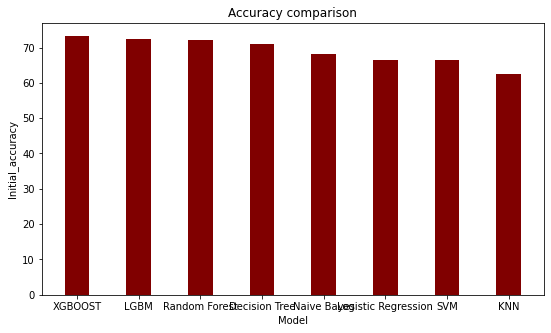

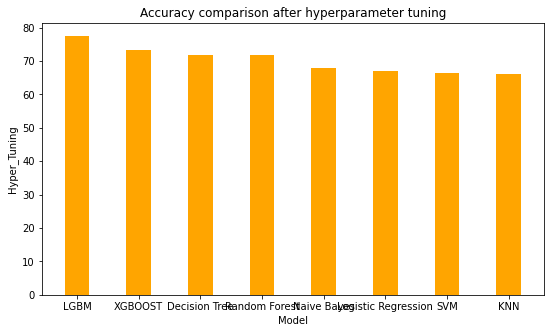

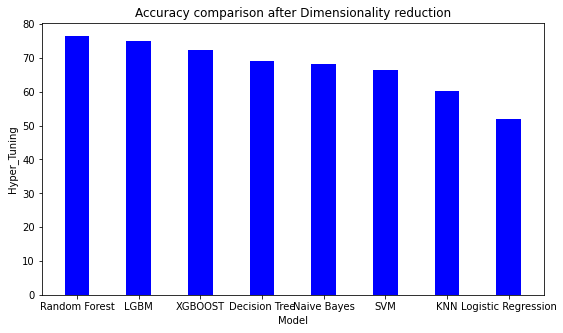

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
#df1
model = list(df1.Model)
iacc = list(df1.Initial_accuracy)
  
fig = plt.figure(figsize = (9, 5))
plt.bar(model, iacc, color ='maroon', width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("Initial_accuracy")
plt.title("Accuracy comparison")
plt.show()

#df2
model = list(df2.Model)
htune = list(df2.Hyper_Tuning)
  
fig = plt.figure(figsize = (9, 5))
plt.bar(model, htune, color ='orange', width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("Hyper_Tuning")
plt.title("Accuracy comparison after hyperparameter tuning")
plt.show()

#df3
model = list(df3.Model)
dreduc = list(df3.Dimensionality_reduction)
  
fig = plt.figure(figsize = (9, 5))
plt.bar(model, dreduc, color ='blue', width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("Hyper_Tuning")
plt.title("Accuracy comparison after Dimensionality reduction")
plt.show()

Algorithms that have accuracy high initially are:
{Logistic Regression}

Algorithms that have accuracy high after performing hyperparameter tuning are:
{LGBM, Navie Bayes, Knn}

Algorithms that have accuracy high after performing dimensionality reduction are: {Random Forest, Decision Tree}

Approximately equal at all times: 
{XGboost, SVM}

## Unsupervised Learning



# K-means Clustering

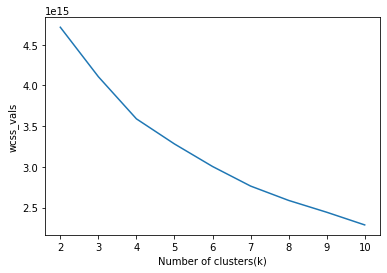

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
i_vals = []

for i in range(2,11):
  i_vals.append(i)
  kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

plt.plot(i_vals,wcss)
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_vals')  
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,init="random",random_state=42)
kmeans.fit(X_train)
KMeans_y_preds = kmeans.predict(X_test)
KMeans_preds = pd.DataFrame({"Predicted":KMeans_y_preds,"Actual":Y_test})
KMeans_preds

,Predicted,Actual
486121,1,1.0
671465,2,1.0
942867,3,0.0
1134456,3,1.0
484074,1,0.0
...,...,...
14921,2,0.0
495294,1,0.0
308270,2,0.0
173985,2,0.0


In [ ]:
KMeans_accuracy = accuracy_score(KMeans_y_preds,Y_test)
print("Initial accuracy is: ",KMeans_accuracy*100)

Initial accuracy is:  23.32114611003163


In [ ]:
Kmeans_TP = len(KMeans_preds[(KMeans_preds["Predicted"]==KMeans_preds["Actual"])&(KMeans_preds["Predicted"]==1)])
Kmeans_FP = len(KMeans_preds[(KMeans_preds["Predicted"]!=KMeans_preds["Actual"])&(KMeans_preds["Predicted"]==1)])
Kmeans_FN = len(KMeans_preds[(KMeans_preds["Predicted"]!=KMeans_preds["Actual"])&(KMeans_preds["Predicted"]==0)])
Kmeans_TN = len(KMeans_preds[(KMeans_preds["Predicted"]==KMeans_preds["Actual"])&(KMeans_preds["Predicted"]==0)])
print(Kmeans_TP,Kmeans_FP,Kmeans_FN,Kmeans_TN)
print("Rightly Classified: ",(Kmeans_TP+Kmeans_TN),"/",(Kmeans_TP+Kmeans_FP+Kmeans_FN+Kmeans_TN))
print("Wrongly Classified: ",(Kmeans_FP+Kmeans_FN),"/",(Kmeans_TP+Kmeans_FP+Kmeans_FN+Kmeans_TN))

Kmeans_Accuracy = (Kmeans_TP+Kmeans_TN)/(Kmeans_TP+Kmeans_FP+Kmeans_FN+Kmeans_TN)
Kmeans_Precision = (Kmeans_TP)/(Kmeans_TP+Kmeans_FP)
Kmeans_Recall = (Kmeans_TP)/(Kmeans_TP+Kmeans_FN)
Kmeans_Specificity = (Kmeans_TN)/(Kmeans_TN+Kmeans_FP)
Kmeans_F1 = (2*Kmeans_Precision*Kmeans_Recall)/(Kmeans_Precision+Kmeans_Recall)

69846 33335 123 127
Rightly Classified:  69973 / 103431
Wrongly Classified:  33458 / 103431


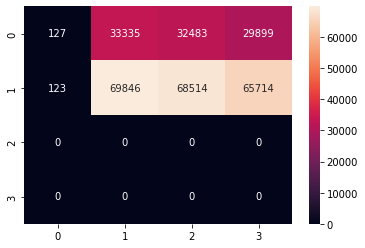

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Kmeans_Confusion_matrix = confusion_matrix(Y_test, KMeans_y_preds)
sns.heatmap(Kmeans_Confusion_matrix, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, KMeans_y_preds))

              precision    recall  f1-score   support

         0.0       0.51      0.00      0.00     95844
         1.0       0.68      0.34      0.45    204197
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.23    300041
   macro avg       0.30      0.09      0.11    300041
weighted avg       0.62      0.23      0.31    300041



In [ ]:
#Dimensionality Reduction for k-means clustering
from sklearn.decomposition import PCA
from lightgbm import *
n_components = [8, 10, 12, 14, 16, 18]
KMc=[]
for n in n_components:
  pca = PCA(n_components=n) # Vary 10 to 8/12..
  X_dimred_train = pca.fit_transform(X_train)
  X_dimred_test = pca.transform(X_test)

  kmeans = KMeans(n_clusters=5,init="random",random_state=42)
  kmeans.fit(X_dimred_train, Y_train)
  KMeans_y_preds = kmeans.predict(X_dimred_test)
  KMeans_accuracy = accuracy_score(KMeans_y_preds,Y_test)
  KMc.append(KMeans_accuracy)
  print(f"n_components = {n}=> Accuracy : {KMeans_accuracy*100}");
KMcmax=max(KMc)
print("Accuracy after performing Dimensionality Reduction is: ",KMcmax)

n_components = 8=> Accuracy : 27.230278528601094
n_components = 10=> Accuracy : 27.23327811865712
n_components = 12=> Accuracy : 27.23327811865712
n_components = 14=> Accuracy : 17.274972420435873
n_components = 16=> Accuracy : 27.204948657016875
n_components = 18=> Accuracy : 28.620421875676993
Accuracy after performing Dimensionality Reduction is:  0.28620421875676993


#Therefore, after building all the models initially we tried to improve accuracy by using dimensionality reduction and hyper parameter tuning many algorithms accuracy was improved after hyper parameter tuning, Initially XGBOOST was performing well but after doing the hyper parameter tuning LGBM accuracy was improved from 72 to 77 this is very large improvement in the accuracy, Random Forest algorithm was improved after implementing dimensionality reduction.

#From the above Comparisons LGBM (Light gradient boost modelling) was performing well for this music recommendation system model.